# Netflix Movie Recommender System

In [1]:
#Importing required basic libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import surprise

In [2]:
# importing data
df = pd.read_excel("D:/project/NetflixDatasetLatest2021_final (1).xlsx")
dff = pd.read_excel("D:/project/NetflixDatasetLatest2021_final (1).xlsx",'ratings')

In [3]:
df.shape

(9425, 30)

In [4]:
dff.shape

(100074, 4)

In [5]:
df.head(5)

,Movie ID,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,Director,...,Netflix Release Date,Production House,Netflix Link,IMDb Link,Summary,IMDb Votes,Image,Poster,TMDb Trailer,Trailer Site
0,1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,Tomas Alfredson,...,2021-03-04,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,https://www.imdb.com/title/tt1139797,A med student with a supernatural gift tries t...,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BOWM4NT...,https://www.youtube.com/watch?v=LqB6XJix-dM,YouTube
1,2,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,Coky Giedroyc,...,2021-03-04,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,https://www.imdb.com/title/tt4193072,"When nerdy Johanna moves to London, things get...",2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...,https://m.media-amazon.com/images/M/MV5BZGUyN2...,https://www.youtube.com/watch?v=eIbcxPy4okQ,YouTube
2,3,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,Mez Tharatorn,...,2021-03-03,NaN,https://www.netflix.com/watch/81306155,https://www.imdb.com/title/tt13393728,After her ex-boyfriend cons her out of a large...,131.0,https://occ-0-2188-64.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BODAzOG...,https://www.youtube.com/watch?v=md3CmFLGK6Y,YouTube
3,4,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,...,2021-03-03,NaN,https://www.netflix.com/watch/81307527,https://www.imdb.com/title/tt2300049,A group of social welfare workers led by their...,47.0,https://occ-0-2508-2706.1.nflxso.net/dnm/api/v...,https://m.media-amazon.com/images/M/MV5BMTc0Nz...,https://www.youtube.com/watch?v=5kyF2vy63r0,YouTube
4,5,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,"Lithuania,Poland,France,Italy,Spain,Greece,Bel...",1-2 hour,Alf Sjöberg,...,2021-03-03,NaN,https://www.netflix.com/watch/81382068,https://www.imdb.com/title/tt0041155,An unhappily married farm worker struggling to...,88.0,https://occ-0-2851-41.1.nflxso.net/dnm/api/v6/...,https://m.media-amazon.com/images/M/MV5BMjVmMz...,https://www.youtube.com/watch?v=H0itWKFwMpQ,YouTube


In [6]:
dff.head(5)

,userId,movieId,rating,timestamp
0,1.0,1.0,4.0,964982703.0
1,1.0,3.0,4.0,964981247.0
2,1.0,6.0,4.0,964982224.0
3,1.0,47.0,5.0,964983815.0
4,1.0,50.0,5.0,964982931.0


# Exploratory Data Analysis 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9425 entries, 0 to 9424
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Movie ID               9425 non-null   int64         
 1   Title                  9425 non-null   object        
 2   Genre                  9400 non-null   object        
 3   Tags                   9389 non-null   object        
 4   Languages              9266 non-null   object        
 5   Series or Movie        9425 non-null   object        
 6   Hidden Gem Score       9415 non-null   float64       
 7   Country Availability   9414 non-null   object        
 8   Runtime                9424 non-null   object        
 9   Director               7120 non-null   object        
 10  Writer                 7615 non-null   object        
 11  Actors                 9314 non-null   object        
 12  View Rating            6827 non-null   object        
 13  IMD

In [8]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100074 entries, 0 to 100073
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     77939 non-null  float64
 1   movieId    77939 non-null  float64
 2   rating     77939 non-null  float64
 3   timestamp  77939 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


## Feature selection

In [9]:
# Creating new dataframe with required columns
df_ml=df[['Movie ID','Title', 'Genre', 'Tags','Director', 'Actors', 'Summary']]
df_ml.head(5)

,Movie ID,Title,Genre,Tags,Director,Actors,Summary
0,1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...",Tomas Alfredson,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",A med student with a supernatural gift tries t...
1,2,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",Coky Giedroyc,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...","When nerdy Johanna moves to London, things get..."
2,3,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Mez Tharatorn,"Kathaleeya McIntosh, Nadech Kugimiya, Pimchano...",After her ex-boyfriend cons her out of a large...
3,4,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",NaN,"Katarzyna Maciag, Piotr Nowak, Marcin Dorocins...",A group of social welfare workers led by their...
4,5,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Alf Sjöberg,"Hugo Björne, Eva Dahlbeck, Ulf Palme, Ragnar F...",An unhappily married farm worker struggling to...


In [10]:
# Check for null values
df_ml.isnull().sum()

Movie ID       0
Title          0
Genre         25
Tags          36
Director    2305
Actors       111
Summary        5
dtype: int64

In [11]:
# filling null values with 'NotSpecified'
df_ml.fillna("NotSpecified",inplace=True)

In [12]:
# droping NotSpecified values of summary column
df_ml = df_ml[df_ml.Summary != 'NotSpecified']

In [13]:
# dropping duplicate values from Title column
df_ml.drop_duplicates(subset=['Title'],inplace=True)

In [25]:
df_ml.shape

(9161, 7)

In [14]:
# checking for null values for dff dataframe
dff.isna().sum()

userId       22135
movieId      22135
rating       22135
timestamp    22135
dtype: int64

In [15]:
dff.fillna("No value", inplace = True)
dff = dff[dff['userId']!='No value']

In [16]:
dff.shape

(77939, 4)

## Data Visualization

### Top 10 Directors 

In [18]:
# splitting Director column 
df2=df_ml['Director'].str.split(',',expand=True).stack()

# creating new dataframe with column name as Directors
df3=pd.DataFrame(df2,columns=['Directors'])

In [19]:
# grouping by Directors to get total content directed by each director
grp_director=df3.groupby(['Directors']).size().reset_index(name='Total Content')

# removing 'Not specified' values from Directors columns 
directors=grp_director[grp_director.Directors !='NotSpecified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
top_directors=directors.head(10)


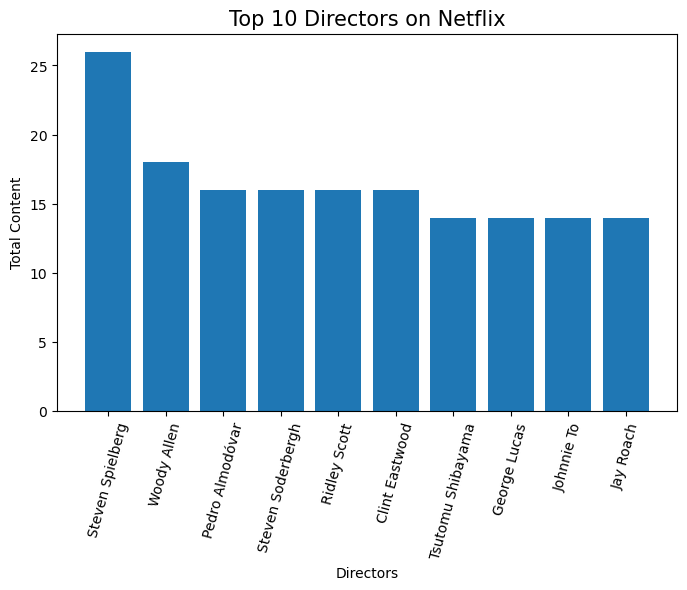

In [20]:
# plotting Top 10 Directors on Netflix
plt.figure(figsize=(8,5), dpi=100)
plt.bar(top_directors['Directors'], top_directors['Total Content'])
plt.title("Top 10 Directors on Netflix",fontsize=15)
plt.xlabel("Directors")
plt.ylabel("Total Content")
plt.xticks(rotation=75)
plt.show()

Top 5 Directors on this plateform are:                                                           
    * Steven Spielberg                                        
    * Woody Allen                                              
    * Ridley Scott                                                    
    * Steven Soderbergh                                              
    * Clint Eastwood 

### Top 10 Actors

In [21]:
# splitting Actors column 
df4=df_ml['Actors'].str.split(',',expand=True).stack()
# creating new dataframe with column name as Actors
df5=pd.DataFrame(df4,columns=['Actors'])

In [22]:
# grouping by Actors to get total content of each Actor
grp_Actors=df5.groupby(['Actors']).size().reset_index(name='Total Content')
# removing 'Not specified' values from Directors columns 
Actors=grp_Actors[grp_Actors.Actors !='NotSpecified']
Actors=Actors.sort_values(by=['Total Content'],ascending=False)
top_Actors=Actors.head(10)

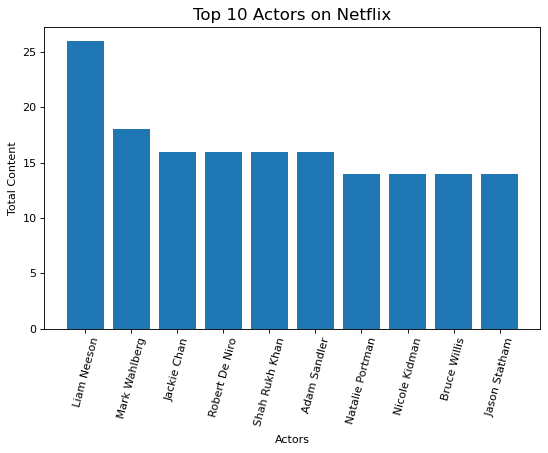

In [23]:
# plotting Top 10 Actors on Netflix
plt.figure(figsize=(8,5), dpi=80)
plt.bar(top_Actors['Actors'], top_directors['Total Content'])
plt.title("Top 10 Actors on Netflix",fontsize=15)
plt.xlabel("Actors")
plt.ylabel("Total Content")
plt.xticks(rotation=75)
plt.show()

Top 5 Actors on this plateform are:                                                                                                             
    * Liam Neeson                                                                                                   
    * Robert De Niro                                                                                             
    * Jackie Chan                                                                                                                      
    * Mark Wahlberg                                                                                                           
    * Bruce Willis 

###  Top Genres on Netflix

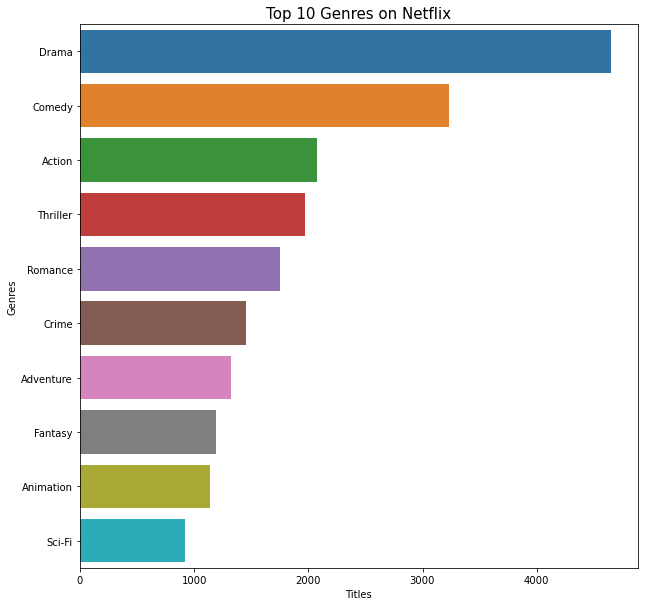

In [24]:
# setting Title column as index and spliting values of Genre column
filtered_genres = df_ml.set_index('Title').Genre.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
# plotting Top 10 Genres on Netflix
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:10])
plt.title('Top 10 Genres on Netflix',fontsize=15)
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

Most watched content is of Genre Drama.

#                                         Data Modeling

## 1. Content-Based Recommender system

### Data Pre-processing

In [26]:
# Splitting columns based on delimiters :
df_ml['Summary']=df_ml['Summary'].apply(lambda x: x.split(" "))
df_ml['Genre']=df_ml['Genre'].apply(lambda x: x.split(","))
df_ml['Tags']=df_ml['Tags'].apply(lambda x: x.split(","))
df_ml['Actors']=df_ml['Actors'].apply(lambda x: x.split(","))
df_ml['Director']=df_ml['Director'].apply(lambda x: str(x).split(","))



In [27]:
# creating a new title column for creating a tag of each title, converting values of title column from string to list type
df_ml['title'] = df_ml['Title']
df_ml['title'] = df_ml['title'].apply(lambda x: [str(x)])    

In [28]:
# creating a function to remove space beween comma separated string of Genre, Tags, Directors and Actors column
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [29]:
for column in df_ml.iloc[:,2:-2]:
    df_ml[column]=df_ml[column].apply(collapse)
    

In [30]:
df_ml.head()

,Movie ID,Title,Genre,Tags,Director,Actors,Summary,title
0,1,Lets Fight Ghost,"[Crime, Drama, Fantasy, Horror, Romance]","[ComedyProgrammes, RomanticTVComedies, HorrorP...",[TomasAlfredson],"[LinaLeandersson, KåreHedebrant, PerRagnar, He...","[A, med, student, with, a, supernatural, gift,...",[Lets Fight Ghost]
1,2,HOW TO BUILD A GIRL,[Comedy],"[Dramas, Comedies, FilmsBasedonBooks, British]",[CokyGiedroyc],"[Cleo, PaddyConsidine, BeanieFeldstein, DónalF...","[When, nerdy, Johanna, moves, to, London,, thi...",[HOW TO BUILD A GIRL]
2,3,The Con-Heartist,"[Comedy, Romance]","[RomanticComedies, Comedies, RomanticFilms, Th...",[MezTharatorn],"[KathaleeyaMcIntosh, NadechKugimiya, Pimchanok...","[After, her, ex-boyfriend, cons, her, out, of,...",[The Con-Heartist]
3,4,Gleboka woda,[Drama],"[TVDramas, PolishTVShows, SocialIssueTVDramas]",[NotSpecified],"[KatarzynaMaciag, PiotrNowak, MarcinDorocinski...","[A, group, of, social, welfare, workers, led, ...",[Gleboka woda]
4,5,Only a Mother,[Drama],"[SocialIssueDramas, Dramas, MoviesBasedonBooks...",[AlfSjöberg],"[HugoBjörne, EvaDahlbeck, UlfPalme, RagnarFalck]","[An, unhappily, married, farm, worker, struggl...",[Only a Mother]


In [31]:
# Creating newTags column :
df_ml['newTags'] = df_ml['Summary'] + df_ml['Director'] + df_ml['Genre'] + df_ml['Tags'] + df_ml['title']

In [32]:
# Creating a new dataframe final_df :
final_df =  df_ml[['Movie ID','Title','newTags']]

In [33]:
final_df = final_df[final_df['Movie ID']!='NotSpecified']

In [34]:
final_df['Movie ID'] = final_df['Movie ID'].astype(float).astype('int')

In [35]:
# joining the newTags :
final_df['newTags'] = final_df['newTags'].apply(lambda x:" ".join(x))

In [36]:
final_df.head()

,Movie ID,Title,newTags
0,1,Lets Fight Ghost,A med student with a supernatural gift tries t...
1,2,HOW TO BUILD A GIRL,"When nerdy Johanna moves to London, things get..."
2,3,The Con-Heartist,After her ex-boyfriend cons her out of a large...
3,4,Gleboka woda,A group of social welfare workers led by their...
4,5,Only a Mother,An unhappily married farm worker struggling to...


In [37]:
# Importing PorterStemmer to replace same types of words into root word.

import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [38]:
# fuction to apply stemmer
def stem(text):
    y=[]    
    for i in text.split():
        y.append(ps.stem(i))        
    return " ".join(y)

In [39]:
# Applying stem function :
final_df['newTags'] = final_df['newTags'].apply(stem)

In [40]:
final_df['newTags'][0]

'a med student with a supernatur gift tri to cash in on hi abil by face off against ghosts, till a wander spirit bring romanc instead. tomasalfredson crime drama fantasi horror romanc comedyprogramm romantictvcomedi horrorprogramm thaitvprogramm let fight ghost'

In [41]:
final_df['newTags'] = final_df['newTags'].apply(lambda x:x.lower())

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

# Creating instance of CountVector :
cv = CountVectorizer(max_features=9000,stop_words='english')
vector = cv.fit_transform(final_df['newTags']).toarray()

In [43]:
vector.shape

(9161, 9000)

In [44]:
from sklearn.metrics.pairwise import cosine_similarity

#creating an instance of cosine_similarity :
similarity = cosine_similarity(vector)
cosine_similarity(vector).shape

(9161, 9161)

#### We are creating a function such that if user will type any movie, then the function will return 10 similar movies to the user.

In [45]:
def recommend(movie):
    index = final_df[final_df['Title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:11]:
        print(final_df.iloc[i[0]].Title)

In [46]:
recommend('Die Hard')

K-On!
Fame
QLIMAX THE SOURCE
A Very Murray Christmas
Tenacious D in: The Pick of Destiny
If a Thousand Clarinets
Opening Night
Metallica Through the Never
Dolly Parton: Here I Am
That Girl in Pinafore


## 2. Collaborative Filtering Based Recommender System:

In [47]:
# creating new dataframe by droping timestamp column from dff dataframe
ratings = dff[['userId','movieId','rating']]
ratings.rename(columns={'userId':'uid','movieId':'iid'},inplace=True)
ratings.head()

,uid,iid,rating
0,1.0,1.0,4.0
1,1.0,3.0,4.0
2,1.0,6.0,4.0
3,1.0,47.0,5.0
4,1.0,50.0,5.0


In [48]:
# finding lowest and highest rating from ratings dataframe
lowest_rating = ratings['rating'].min()
highest_rating = ratings['rating'].max()
# Converting the data into Surprise understandable format
reader = surprise.Reader(rating_scale = (lowest_rating,highest_rating))
data = surprise.Dataset.load_from_df(ratings,reader)

similarity_options = {'name': 'cosine', 'user_based': True}

In [49]:
# Building the algorithm
algo = surprise.KNNBasic(sim_options = similarity_options) # Default k = 40
output = algo.fit(data.build_full_trainset())

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [50]:
# user for which we want the recommendations
u_Id = int(input("Enter user Id : "))

Enter user Id : 50


In [51]:
# testing the algorithm for a movie
pred = algo.predict(uid=u_Id,iid='120')
print(pred.est)

3.503188390921105


In [52]:
df_50 = ratings[ratings['uid']==u_Id]
items_50 = df_50['iid']

all_items = ratings['iid'].unique()
iids_to_predict = np.setdiff1d(all_items,items_50)

# creting testset initially having rating as 0
testset = [[u_Id,movieId,0.] for movieId in iids_to_predict]

# Applying the algorithm 
predictions = algo.test(testset)

pred_ratings = np.array([pred.est for pred in predictions])
i_max = np.argmax(pred_ratings)

print("Topmost recommended Item is", iids_to_predict[i_max])
print("with expected rating as", pred_ratings[i_max])

Topmost recommended Item is 53.0
with expected rating as 5.0


In [53]:
import heapq
i_sorted = heapq.nlargest(10,range(len(pred_ratings)),
                          pred_ratings.take)

print("Top 10 Recomended Items are",iids_to_predict[i_sorted ])

Top 10 Recomended Items are [53.0 99.0 148.0 467.0 496.0 626.0 633.0 876.0 1140.0 1631.0]


In [54]:
rec=iids_to_predict[i_sorted]
recommended=[]
for i in rec:
    recommended.append(final_df.loc[final_df['Movie ID']==i].Title)
for j in recommended:    
    print(j.values[0])

Gonjiam: Haunted Asylum
Uppercut
Dragon Quest: The Adventure of Dai
Mutafukaz
Godzilla vs. King Ghidorah
Hillbilly Elegy
Playing with Fire
A Kind of America
The Maid
School Daze


### 3. Hybrid Recommender System

In [55]:
#Merging dataframes
new_df1=df[["Movie ID","Title","Genre"]]

new_df2=new_df1.rename(columns={"Movie ID":"movieId","Title":"title"})

merged_df = new_df2.merge(dff,on = "movieId", how = 'left')
merged_df["timestamp"] = pd.to_datetime(merged_df["timestamp"], format='%Y-%m-%d')
merged_df

,movieId,title,Genre,userId,rating,timestamp
0,1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance",1.0,4.0,1970-01-01 00:00:00.964982703
1,1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance",5.0,4.0,1970-01-01 00:00:00.847434962
2,1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance",7.0,4.5,1970-01-01 00:00:01.106635946
3,1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance",15.0,2.5,1970-01-01 00:00:01.510577970
4,1,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance",17.0,4.5,1970-01-01 00:00:01.305696483
...,...,...,...,...,...,...
85453,9150,13 Going on 30,"Comedy, Fantasy, Romance",NaN,NaN,NaT
85454,9151,LIFE 2.0,Documentary,NaN,NaN,NaT
85455,9152,Brand New Day,"Documentary, Music",NaN,NaN,NaT
85456,9153,Daniel Arends: Blessuretijd,Comedy,NaN,NaN,NaT


In [56]:
# To get rid of all the ending white space characters that might have appeared 
#merged_df['title'] = merged_df['title'].apply(lambda x: x.strip())

a = pd.DataFrame(merged_df["title"].value_counts())
rare_movies = a[a["title"] <= 50].index
common_movies = merged_df[~merged_df["title"].isin(rare_movies)]
user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")

In [57]:
# choosing  a user to get recommendation for :
user_id =int(input("Enter user id : "))

Enter user id : 50


In [58]:
# Determining the movies watched by the recommended user
user_df = user_movie_df[user_movie_df.index == user_id]

movies_watched = user_df.columns[user_df.notna().any()].tolist()
len(movies_watched)
# the number of movies the user has watched 

69

In [59]:
# Accessing data and Ids of other users watching the same movies 
movies_watched_df = user_movie_df[movies_watched]
movies_watched_df.head()
movies_watched_df.shape
# There are 138493 users who watched at least one of the movies the user watched.

(606, 69)

In [60]:
# each user watched how many of these 455 movies
user_movie_count = movies_watched_df.T.notnull().sum()
user_movie_count.head()

userId
1.0    22
2.0     2
3.0     1
4.0    20
5.0     5
dtype: int64

In [61]:
user_movie_count = user_movie_count.reset_index()
user_movie_count.columns = ["userId", "movie_count"]
m_count = movies_watched_df.shape[1]   # 391

# choosen a ratio of 0.60. User ids who watched at least percent of 60 these movies 
users_same_movies=user_movie_count[user_movie_count["movie_count"]/m_count > 0.6].sort_values("movie_count", ascending=False)
users_same_movies.nunique()

userId         34
movie_count    22
dtype: int64

In [62]:
users_same_movies.head()

,userId,movie_count
49,50.0,69
412,414.0,66
471,474.0,65
594,599.0,62
272,274.0,61


In [63]:
# We bring together users who watch the same movies with the user. (not overlook the above ratio)
final_df2 = pd.concat([movies_watched_df[movies_watched_df.index.isin(users_same_movies.index)],
                      user_df[movies_watched]])

final_df2.head()

title,#blackAF,A Dogs Journey,A Street Cat Named Bob,All For Love,All for Love,Anavitória: Araguaína - Las Vegas,Animal Crackers,Arifureta: From Commonplace to Worlds Strongest,As One,Assassination Nation,...,The Old Guard,The Secrets,Theres Something About Mary,Ultraman Z,Vivah,Wanton Mee,Wasteful Days of High School Girls,West Coast Customs,Wet Woman in the Wind,White House Farm
userId,,,,,,,,,,,,,,,,,,,,,
17.0,NaN,NaN,NaN,5.0,5.0,NaN,NaN,5.0,NaN,4.5,...,NaN,5.0,NaN,NaN,NaN,4.0,NaN,5.0,NaN,4.0
49.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63.0,2.0,NaN,4.0,4.0,4.0,NaN,5.0,3.5,NaN,5.0,...,5.0,NaN,NaN,NaN,5.0,4.0,NaN,4.0,3.0,3.0
67.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
corr_df = final_df2.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df = corr_df.reset_index()
corr_df.head()

,user_id_1,user_id_2,corr
0,305.0,90.0,-1.000000
1,303.0,328.0,-0.995871
2,412.0,286.0,-0.984732
3,378.0,605.0,-0.944911
4,326.0,49.0,-0.944911


We are interested in users who have a high correlation with the user_id. Could analysis it by entering a value

In [65]:
top_users = corr_df[(corr_df["user_id_1"] == user_id) & (corr_df["corr"] >= 0.60)][
    ["user_id_2", "corr"]].reset_index(drop=True)

top_users = top_users.sort_values(by='corr', ascending=False)

# Users who have more than 0.60 corr with the user
top_users.rename(columns={"user_id_2": "userId"}, inplace=True) 
top_users.T

,0
userId,90.000000
corr,0.866025


In [66]:
# Calculation weighted rating

top_users_ratings = top_users.merge(dff[["userId", "movieId", "rating"]], how='inner')
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']
top_users_ratings.head()

,userId,corr,movieId,rating,weighted_rating
0,90.0,0.866025,1.0,3.0,2.598076
1,90.0,0.866025,7.0,4.0,3.464102
2,90.0,0.866025,14.0,5.0,4.330127
3,90.0,0.866025,17.0,5.0,4.330127
4,90.0,0.866025,25.0,5.0,4.330127


In [67]:
top_users_ratings['weighted_rating'] = top_users_ratings['weighted_rating'].astype(float)

In [68]:
# Calculating the weighted average recommendation score and keeping the top ten films
# Unique rating for movieId 
temp = top_users_ratings.groupby('movieId').sum()[['corr', 'weighted_rating']]
temp.columns = ['sum_corr', 'sum_weighted_rating']
temp.head()

,sum_corr,sum_weighted_rating
movieId,,
1.0,0.866025,2.598076
7.0,0.866025,3.464102
14.0,0.866025,4.330127
17.0,0.866025,4.330127
25.0,0.866025,4.330127


In [69]:
# Calculating weighted average recommendation score and keeping top five films based on scores
recommendation_df = pd.DataFrame()
recommendation_df['weighted_average_recommendation_score'] = temp['sum_weighted_rating'] / temp['sum_corr']
recommendation_df['movieId'] = temp.index
recommendation_df = recommendation_df.sort_values(by='weighted_average_recommendation_score', ascending=False)
recommendation_df.head(7)

,weighted_average_recommendation_score,movieId
movieId,,
1411.0,5.0,1411.0
85.0,5.0,85.0
1357.0,5.0,1357.0
818.0,5.0,818.0
1358.0,5.0,1358.0
984.0,5.0,984.0
1034.0,5.0,1034.0


In [70]:
# movies that the user may like

final = merged_df.loc[merged_df['movieId'].isin(recommendation_df.head(10)['movieId'])]

In [71]:
final_recommendations=final.groupby("title").agg({"rating": "max"}).sort_values("rating", ascending=False)

In [72]:
final_recommendations.head(10)

,rating
title,
3 Peas in a Pod,5.0
Angels Last Mission: Love,5.0
Be with Me,5.0
Cheese in the Trap,5.0
Frankenstein Conquers the World,5.0
High Score,5.0
Rememory,5.0
Rojo,5.0
Ten Years Japan,5.0


# Model Deployment

In [73]:
import  streamlit as st
import pickle

In [74]:
# converting python object hierarchy into a byte stream

pickle.dump(final_df.to_dict(),open('movies.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [75]:
pickle.dump(ratings.to_dict(),open('users1.pkl','wb'))

In [76]:
pickle.dump(dff.to_dict(),open('dff.pkl','wb'))
pickle.dump(merged_df.to_dict(),open('merged_df.pkl','wb'))
pickle.dump(user_movie_df.to_dict(),open('hybrid.pkl','wb'))